In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from matplotlib.lines import Line2D

In [2]:
def color_map_USA(v):
    cm = []
    for i in v:
        if(i>0):
            cm.append((0, 0.3922, 0, i/0.5))
        else:
            cm.append((0.7098, 0.2824, 0.5019, abs(i)/0.75))

    return cm

def color_map_IN(v):
    cm = []
    for i in v:
        if(i>0): 
            cm.append((0, 0, 1, i/0.6))
        else:
            cm.append((1, 0, 0, abs(i)))

    return cm

def map_en_name(s):
    if(s=='aap' or s=='bjp'):
        return s.upper()
    
    return s.title()

map_org_name = {'checkyourfact': 'Check Your Fact', 'politifact': 'PolitiFact', 'snopes': 'Snopes', 'altnews': 'Alt News', 'boomlive': 'Boom', 'opindia': 'OpIndia'}

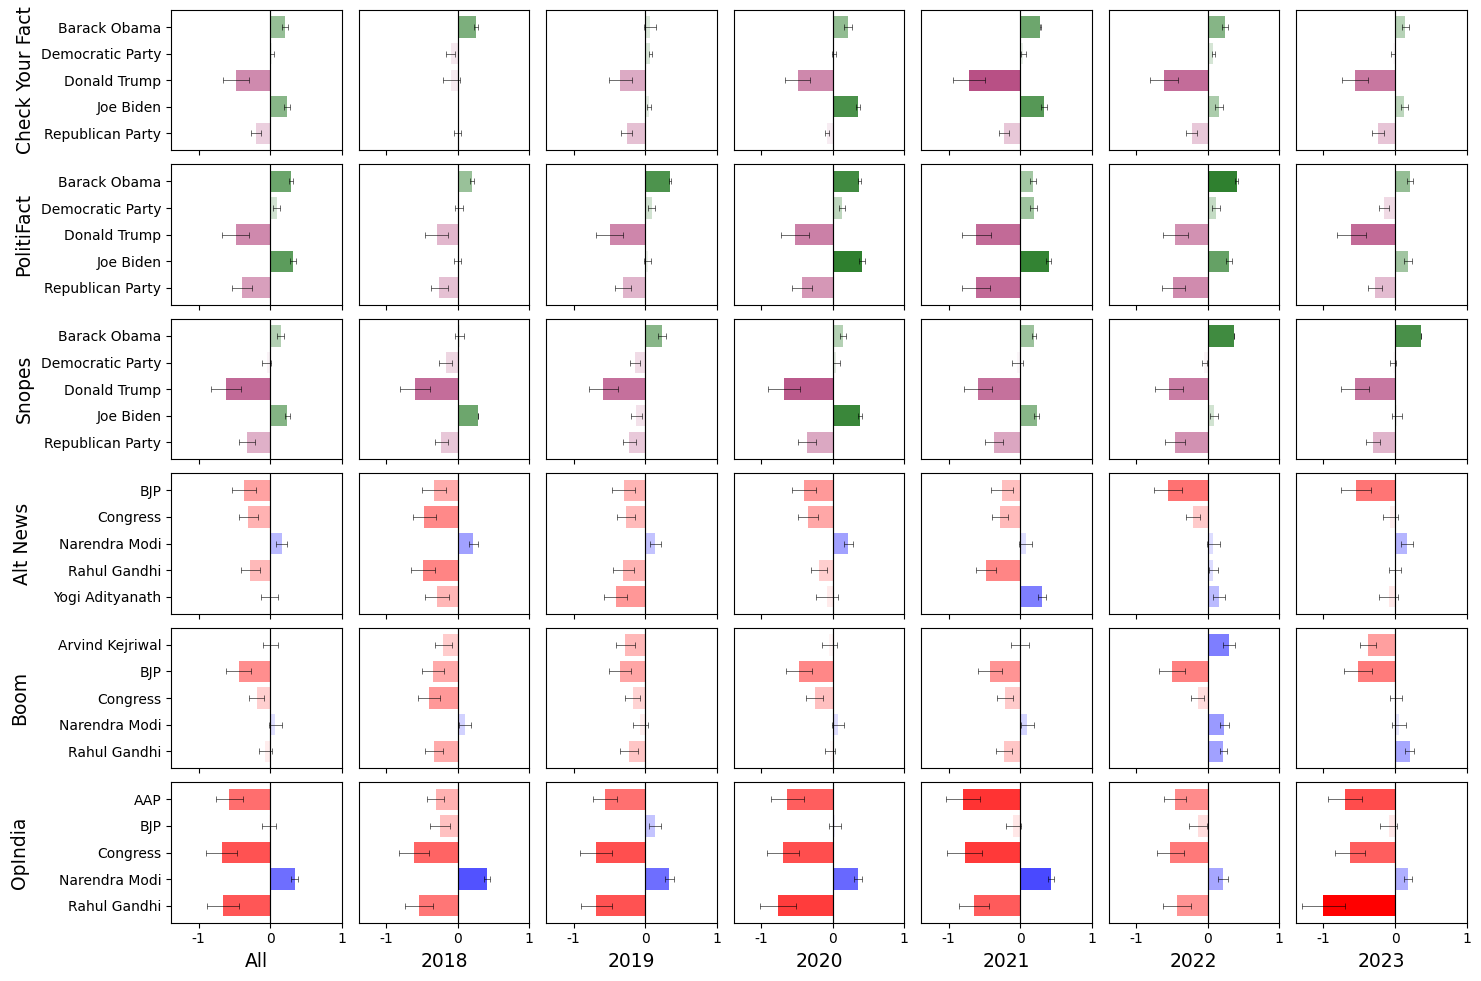

In [3]:
fig, ((ax1,ax2,ax3,ax4,ax5,ax6,ax7), (ax8,ax9,ax10,ax11,ax12,ax13,ax14), (ax15,ax16,ax17,ax18,ax19, ax20, ax21), (ax22, ax23, ax24,ax25, ax26, ax27, ax28), (ax29, ax30,ax31, ax32, ax33, ax34, ax35), (ax36,ax37,ax38,ax39,ax40,ax41,ax42)) = plt.subplots(6, 7, sharex=True, figsize=(15, 10))

plt.rcParams['font.size'] = 13

error_bar_settings = {
    'ecolor': 'black',  
    'elinewidth': 0.4,    
    'capsize': 2,
    'capthick': 0.4
}

for f in ['checkyourfact', 'politifact', 'snopes']:
    years = ['all', 2018, 2019, 2020, 2021, 2022, 2023]
    df = pd.read_excel('../RQ2/Graph Data/'+f+'.xlsx')
    dfE = pd.read_excel('../RQ2/Graph Data/Err_'+f+'.xlsx')

    ax_map = {'checkyourfact': (ax1,ax2,ax3,ax4,ax5,ax6,ax7), 'politifact': (ax8,ax9,ax10,ax11,ax12,ax13,ax14), 'snopes': (ax15,ax16,ax17,ax18,ax19, ax20, ax21)}
    for year,ax in zip(years,ax_map[f]):
        #data = df[df.year==year]#{'modi': .66, 'rahul': -.5, 'bjp': .5, 'aap':-0.3}

        # Extracting labels and values
        labels = list(df[df.year==year].iloc[0].index)[1:]
        labels = [map_en_name(i) for i in labels]
        values = list(df[df.year==year].iloc[0])[1:]
        valuesE = list(dfE[df.year==year].iloc[0])[1:]

        # Plotting bar graph
        ax.barh(np.arange(len(labels)), values, xerr=valuesE, color=color_map_USA(values), error_kw=error_bar_settings)

        midpoint = 0#(np.min(values) + np.max(values)) / 2
        ax.axvline(x=midpoint, color='k', linestyle='-', linewidth=0.85) 
        
        ax.set_yticks([])
        if(ax==ax1 or ax==ax8 or ax==ax15):
            ax.set_yticks(np.arange(len(labels)))
            ax.set_yticklabels(labels)
            if(f=='checkyourfact'):
                ax.set_ylabel(map_org_name[f], labelpad=4, fontsize=13.5)
            elif(f=='politifact'):
                ax.set_ylabel(map_org_name[f], labelpad=5.5, fontsize=13.5)
            else:
                ax.set_ylabel(map_org_name[f], labelpad=5, fontsize=13.5)
        else:
            ax.set_yticklabels([])


for f in ['altnews', 'boomlive', 'opindia']:
    years = ['all', 2018, 2019, 2020, 2021, 2022, 2023]
    df = pd.read_excel('../RQ2/Graph Data/'+f+'.xlsx')
    dfE = pd.read_excel('../RQ2/Graph Data/Err_'+f+'.xlsx')

    ax_map = {'altnews': (ax22, ax23, ax24,ax25, ax26, ax27, ax28), 'boomlive': (ax29, ax30,ax31, ax32, ax33, ax34, ax35), 'opindia': (ax36,ax37,ax38,ax39,ax40,ax41,ax42)}
    for year,ax in zip(years,ax_map[f]):
        #data = df[df.year==year]#{'modi': .66, 'rahul': -.5, 'bjp': .5, 'aap':-0.3}

        # Extracting labels and values
        labels = list(df[df.year==year].iloc[0].index)[1:]
        labels = [map_en_name(i) for i in labels]
        values = list(df[df.year==year].iloc[0])[1:]
        valuesE = list(dfE[df.year==year].iloc[0])[1:]

        # Plotting bar graph
        ax.barh(np.arange(len(labels)), values, xerr=valuesE, color=color_map_IN(values), error_kw=error_bar_settings)

        midpoint = 0#(np.min(values) + np.max(values)) / 2
        ax.axvline(x=midpoint, color='k', linestyle='-', linewidth=0.85)
        # Adding labels and title
        if(f=='opindia'):
            if(year=='all'):
                ax.set_xlabel(year.title(), fontsize=13.5)
            else:
                ax.set_xlabel(year, fontsize=13.5)
            ax.set_xticks([-1,0,1]) 
            ax.set_xticklabels([-1,0,1], fontsize=10)  
        
        ax.set_yticks([])
        if(ax==ax22 or ax==ax29 or ax==ax36):
            ax.set_yticks(np.arange(len(labels)))
            ax.set_yticklabels(labels)
            if(f=='altnews'):
                ax.set_ylabel(map_org_name[f], labelpad=15.5, fontsize=13.5)
            elif(f=='boomlive'):
                ax.set_ylabel(map_org_name[f], labelpad=20.5, fontsize=13.5)
            else:
                ax.set_ylabel(map_org_name[f], labelpad=21.5, fontsize=13.5)
        else:
            ax.set_yticklabels([])

plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.1)
#plt.savefig('SentimentPolarity_ErrBar.pdf', format='pdf')
plt.show()